In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the first dataset about road traffic flows and vehicle-kilometres for 2019 for each vehicle type

In [2]:
vkm_df = pd.read_excel("datasets/laei-2019-major-roads-vkm-flows-speeds.xlsx")

In [3]:
vkm_df.head()

,Year,TOID,LAEI Zone,Borough,Road Classification,AADT Motorcycle,AADT Taxi,AADT Petrol Car,AADT Diesel Car,AADT Electric Car,...,VKM Electric LGV,VKM 2019 - HGVs - Rigid - 2 Axles,VKM 2019 - HGVs - Rigid - 3 Axles,VKM 2019 - HGVs - Rigid - 4 or more Axles,VKM 2019 - HGVs - Articulated - 3 to 4 Axles,VKM 2019 - HGVs - Articulated - 5 Axles,VKM 2019 - HGVs - Articulated - 6 Axles,VKM 2019 - Buses,VKM 2019 - Coaches,VKM 2019 - Total
0,2019,osgb4000000027947700,Non-GLA,Non-GLA,A Road,112,15,5470,3780,32,...,50,3659,736,1451,531,2759,3659,-,327,231749
1,2019,osgb4000000027908760,Non-GLA,Non-GLA,A Road,68,10,3049,2107,18,...,78,1718,344,687,258,1289,1718,-,1160,295268
2,2019,osgb4000000027987795,Non-GLA,Non-GLA,A Road,131,15,5752,3976,34,...,57,1377,275,551,192,1042,1377,-,7746,158880
3,2019,osgb4000000027869099,Non-GLA,Non-GLA,A Road,178,14,7280,5031,43,...,2066,63666,12679,25359,9172,48019,63396,-,97388,4851571
4,2019,osgb4000000030443012,Non-GLA,Non-GLA,A Road,178,34,8433,5828,50,...,11,465,94,185,67,352,465,-,446,43270


In [4]:
vkm_df.shape

(79437, 48)

In [5]:
vkm_df.columns

Index(['Year', 'TOID', 'LAEI Zone', 'Borough', 'Road Classification',
       ' AADT Motorcycle ', ' AADT Taxi ', ' AADT Petrol Car ',
       ' AADT Diesel Car ', ' AADT Electric Car ', ' AADT Petrol PHV ',
       ' AADT Diesel PHV ', ' AADT Electric PHV ', ' AADT Petrol LGV ',
       ' AADT Diesel LGV ', ' AADT Electric LGV ',
       ' AADT 2019 - HGVs - Rigid - 2 Axles ',
       ' AADT 2019 - HGVs - Rigid - 3 Axles ',
       ' AADT 2019 - HGVs - Rigid - 4 or more Axles ',
       ' AADT 2019 - HGVs - Articulated - 3 to 4 Axles ',
       ' AADT 2019 - HGVs - Articulated - 5 Axles ',
       ' AADT 2019 - HGVs - Articulated - 6 Axles ', ' AADT 2019 - Buses ',
       ' AADT 2019 - Coaches ', ' AADT 2019 - Total ',
       ' Speed (km/hr) - Except Buses ', ' Speed (km/hr) - Buses Only ',
       ' Link Length (m) ', ' VKM Motorcycle ', ' VKM Taxi ',
       ' VKM Petrol Car ', ' VKM Diesel Car ', ' VKM Electric Car ',
       ' VKM Petrol PHV ', ' VKM Diesel PHV ', ' VKM Electric PHV ',
       

This dataset likely serves to analyze and estimate vehicle emissions at a road network level, focusing on traffic volume (via AADT and VKM data) and vehicle types (motorcycles, cars, buses, etc.). TOID is a unique identifier for each road segment or link in the road network.

The second dataset includes emissions of key pollutants NOx, PM10, PM2.5 and CO2, and a range of additional pollutants (SO2, CH4, VOC...) in tonnes/year for 2013, 2016, 2019, 2025 and 2030 for each source category at a 1km grid square resolution

In [6]:
emissions_df = pd.read_excel("datasets/LAEI-2019-Emissions-Summary-including-Forecast.xlsx", sheet_name="Emissions by Grid ID")

In [7]:
emissions_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2030,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019183,0.019183,NaN,tonnes/annum
1,2030,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.015719,0.015719,NaN,tonnes/annum
2,2030,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.019878,0.019878,NaN,tonnes/annum
3,2030,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020946,0.020946,NaN,tonnes/annum
4,2030,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020105,0.020105,NaN,tonnes/annum


In [8]:
emissions_df.shape

(699120, 30)

In [10]:
emissions_df.columns

Index(['Year', 'Grid ID 2019', 'LAEI 1km2 ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Main Source Category', 'Sector', 'Source', 'bap',
       'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg', 'n2o',
       'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2',
       'Emissions Unit'],
      dtype='object')

We use groupby and then count unique pollutants across all rows for each Year, Grid ID 2019, Easting, Northing, Borough, and Zone.

In [11]:
key_columns = ['Year', 'Grid ID 2019', 'Easting', 'Northing', 'Borough', 'Zone']
unique_pollutants_per_location = emissions_df.groupby(key_columns)['Source'].nunique()
unique_pollutants_per_location[unique_pollutants_per_location.index.get_level_values('Year') == 2019]

Year  Grid ID 2019  Easting  Northing  Borough    Zone   
2019  1             510500   203500    Non GLA    Non GLA    39
      2             511500   203500    Non GLA    Non GLA    39
      3             512500   203500    Non GLA    Non GLA    39
      4             515500   203500    Non GLA    Non GLA    39
      5             516500   203500    Non GLA    Non GLA    39
                                                             ..
      3456          531500   179500    Southwark  Inner      39
      3457          531500   179500    Southwark  Central    39
      3458          530500   181500    Camden     Central    39
      3459          532500   181500    Islington  Central    39
      3460          532500   181500    City       Central    39
Name: Source, Length: 3460, dtype: int64

This likely means there are exactly 39 unique pollutants recorded for each unique combination of location (Easting, Northing, etc.) for the year 2019. The dataset is structured such that each location-time combination is spread across 39 rows, one for each pollutant.

We keep only the rows for 2019

In [12]:
emissions2019_df = emissions_df[(emissions_df['Year'] == 2019)]
emissions2019_df.head()

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
285264,2019,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021923,0.021923,NaN,tonnes/annum
285265,2019,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017965,0.017965,NaN,tonnes/annum
285266,2019,3,5912,512500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022718,0.022718,NaN,tonnes/annum
285267,2019,4,5915,515500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023939,0.023939,NaN,tonnes/annum
285268,2019,5,5916,516500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022977,0.022977,NaN,tonnes/annum


In [13]:
emissions2019_df.shape

(143976, 30)

In [14]:
emissions2019_df[['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit']].nunique()

Year                 1
Grid ID 2019      3460
LAEI 1km2 ID      2466
Borough             34
Zone                 4
Emissions Unit       1
dtype: int64

We drop the column with only one unique value and the ones about location since we will use Easting and Northing

In [15]:
emissions2019_df.drop(columns=['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit'], inplace=True)

/var/folders/g6/knk2jdt132s0968_pqmjppfm0000gn/T/ipykernel_13686/2732393880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions2019_df.drop(columns=['Year', 'Grid ID 2019', 'LAEI 1km2 ID','Borough', 'Zone','Emissions Unit'], inplace=True)


In [16]:
emissions2019_df.columns

Index(['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source',
       'bap', 'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg',
       'n2o', 'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2'],
      dtype='object')

We reshape the DataFrame by aggregating pollutant emissions data on a single row for each unique combination of location (Easting, Northing) and source (Main Source Category, Sector, Source). This will ensure that for each combination of these variables, we will have all the pollutant columns aligned in the same row, rather than spread across multiple rows.

In [17]:
main_columns = ['Easting', 'Northing','Main Source Category','Sector','Source']
pollutant_columns = ['bap', 'cd', 'c4h6', 'c6h6', 'ch4', 'co', 'co2', 'hc', 'hcl', 'hg', 'n2o',
                     'nh3', 'nmvoc', 'nox', 'pb', 'pcb', 'pm10', 'pm2.5', 'so2']
emissions2019_df = emissions2019_df.groupby(main_columns, as_index=False).agg(
    {col: 'first' for col in pollutant_columns}
)

emissions2019_df


,Easting,Northing,Main Source Category,Sector,Source,bap,cd,c4h6,c6h6,ch4,...,hg,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2
0,501500,167500,Domestic,Biomass,Wood Burning,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.774296e-02,1.774296e-02,NaN
1,501500,167500,Domestic,Heat and Power Generation,Gas Combustion,NaN,NaN,NaN,0.001483,0.030168,...,NaN,0.000603,NaN,0.016482,0.090240,NaN,NaN,7.240421e-03,7.240421e-03,NaN
2,501500,167500,Domestic,Heat and Power Generation,Oil/Coal Combustion,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,NaN
3,501500,167500,Domestic,Machinery,Household and Garden NRMM,2.092833e-07,6.928983e-10,0.000575,0.002742,0.001567,...,3.117615e-08,0.000148,0.000016,0.040752,0.025920,1.278754e-07,NaN,6.596544e-04,6.596544e-04,0.000045
4,501500,167500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.379200e-02,3.379200e-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103511,561500,186500,Transport,Road Transport,LGV - Diesel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.014163,NaN,NaN,9.903945e-04,9.408747e-04,NaN
103512,561500,186500,Transport,Road Transport,LGV - Petrol,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000027,NaN,NaN,0.000000e+00,0.000000e+00,NaN
103513,561500,186500,Transport,Road Transport,PHV - Diesel,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000117,NaN,NaN,4.243911e-06,4.031715e-06,NaN
103514,561500,186500,Transport,Road Transport,PHV - Petrol,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000010,NaN,NaN,0.000000e+00,0.000000e+00,NaN


In [19]:
emissions2019_df.shape

(103516, 24)

In [21]:
emissions2019_df.duplicated(subset=main_columns).sum()

0

In [22]:
pollutant_missing_percentage = emissions2019_df[pollutant_columns].isna().sum() / emissions2019_df.shape[0] * 100
pollutant_missing_percentage

bap      78.559836
cd       88.088798
c4h6     76.177596
c6h6     69.030874
ch4      64.266394
co       64.266394
co2      21.440164
hc       95.235519
hcl      92.853279
hg       85.706557
n2o      76.177596
nh3      78.559836
nmvoc    61.884153
nox      14.293443
pb       85.706557
pcb      83.324317
pm10      2.382240
pm2.5     2.382240
so2      76.177596
dtype: float64

A lot of missing data for most of the pollutants. What we should do?

Let's see how for each of the four pollutants that have less than 50% of missing data (pm10, pm2.5, nox, co2) is spread across different sectors

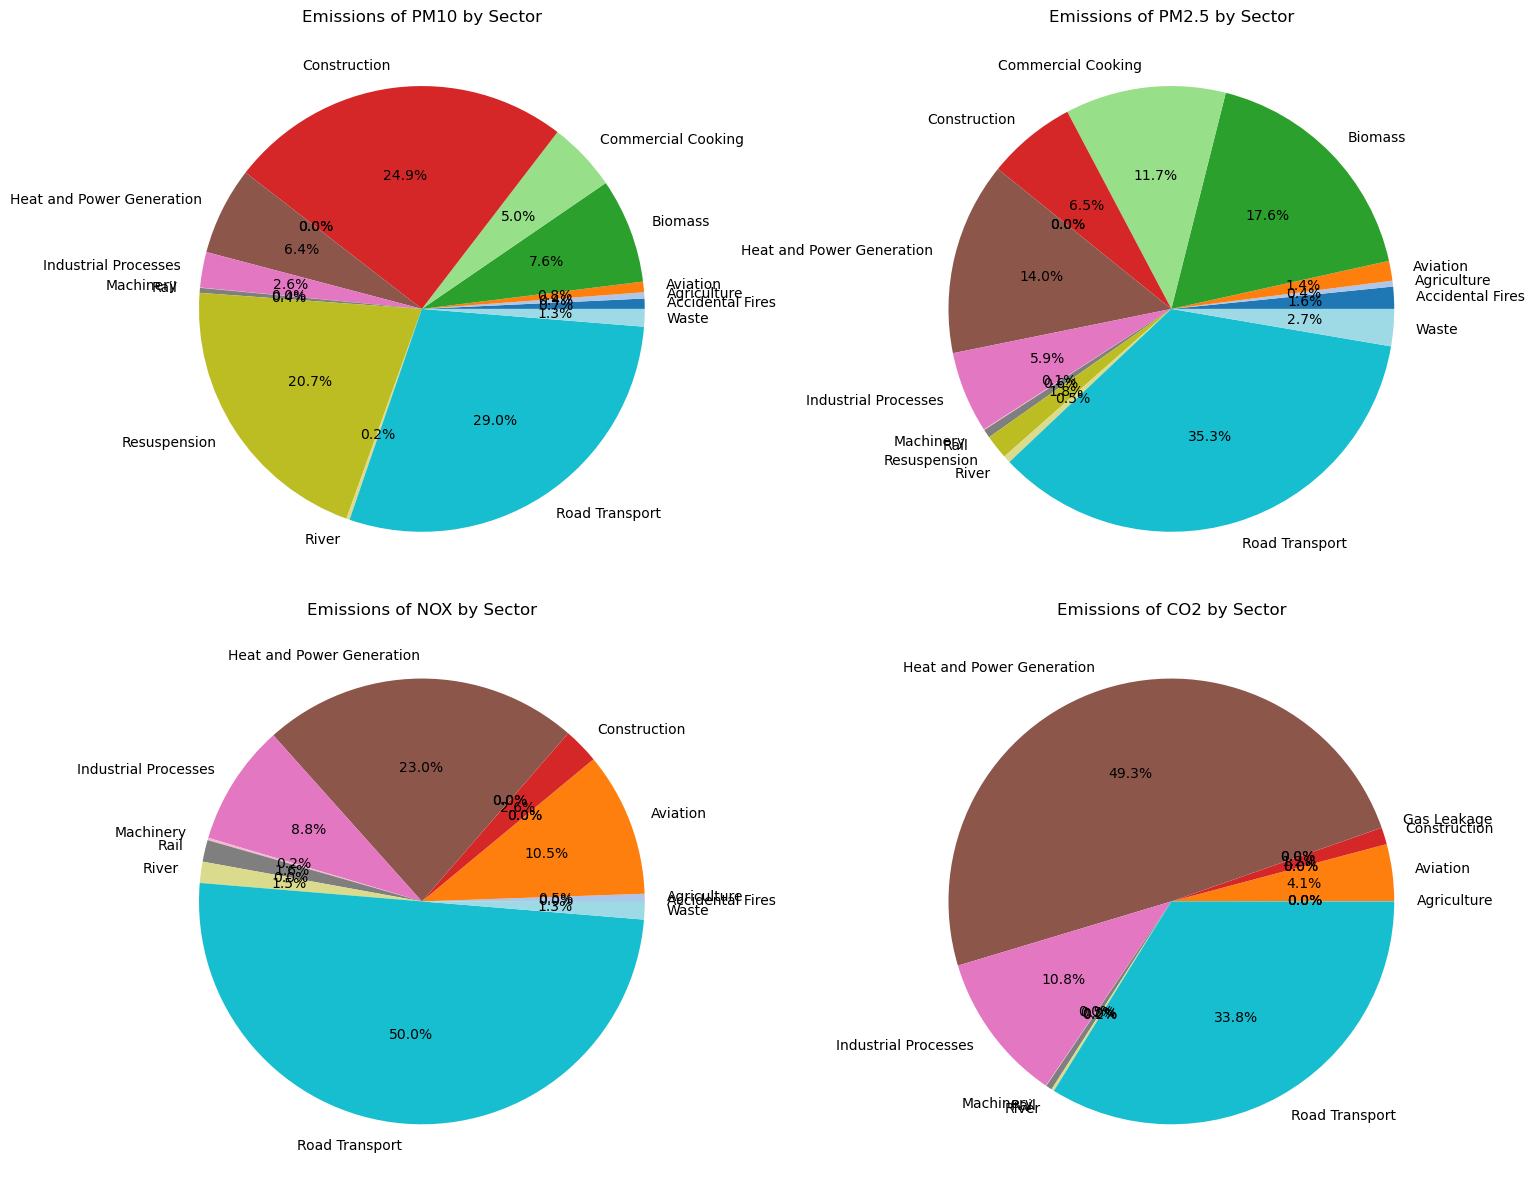

In [26]:
grouped_by_sector = emissions2019_df.groupby('Sector')[["pm10","pm2.5","nox","co2"]].sum()
pollutants = ['pm10', 'pm2.5', 'nox', 'co2']


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    grouped_by_sector[pollutant].plot(
        kind='pie',
        autopct='%1.1f%%', 
        ax=ax, 
        colormap='tab20', 
        legend=False
    )
    ax.set_ylabel('')  # Remove y-axis label for a cleaner look
    ax.set_title(f'Emissions of {pollutant.upper()} by Sector')

plt.tight_layout()
plt.show()

While Road Transport and Heat and Power Generation emerge as the most significant contributors to emissions, it is crucial to note that no single sector exceeds 50% in any category. This indicates a more distributed emission landscape, with multiple sectors contributing in meaningful but varying degrees across pollutants.

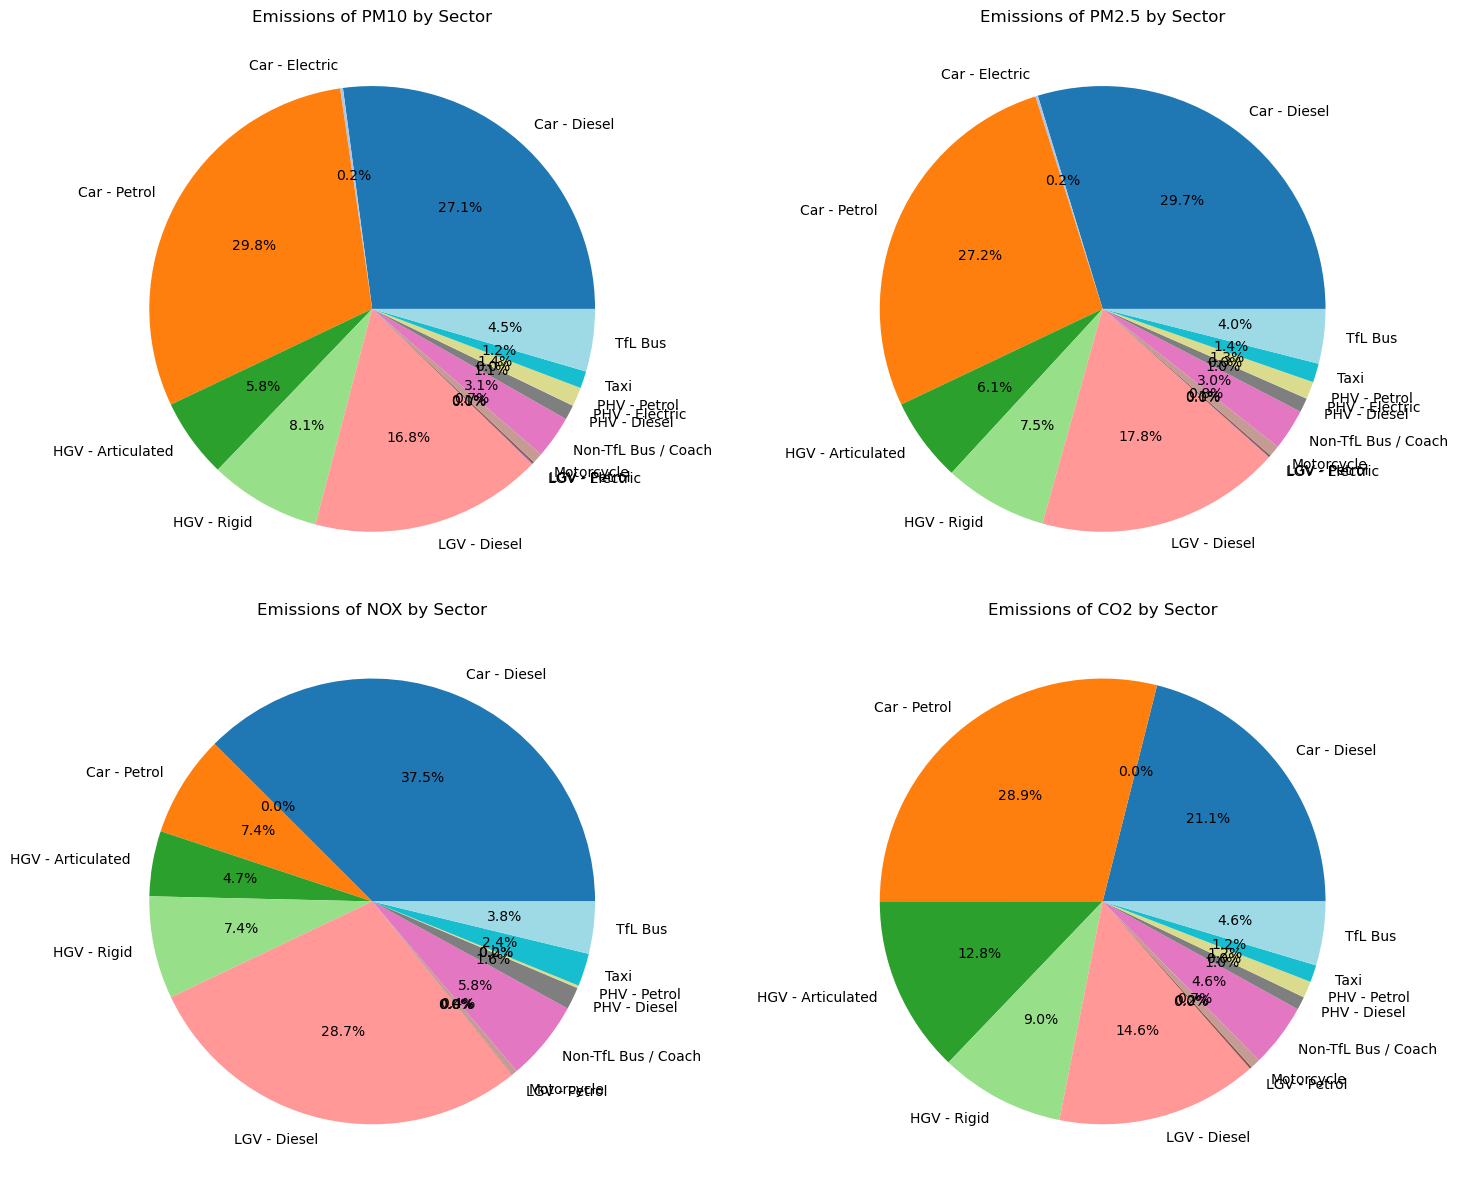

In [34]:
road_transport_data = emissions2019_df[emissions2019_df['Sector'] == 'Road Transport']

grouped_by_road_transport_source = road_transport_data.groupby('Source')[["pm10","pm2.5","nox","co2"]].sum()
pollutants = ['pm10', 'pm2.5', 'nox', 'co2']


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, pollutant in enumerate(pollutants):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    grouped_by_road_transport_source[pollutant].plot(
        kind='pie',
        autopct='%1.1f%%', 
        ax=ax, 
        colormap='tab20', 
        legend=False
    )
    ax.set_ylabel('')  # Remove y-axis label for a cleaner look
    ax.set_title(f'Emissions of {pollutant.upper()} by Sector')

plt.tight_layout()
plt.show()

In [36]:
road_transport_data["Source"].unique()

array(['Car - Diesel', 'Car - Electric', 'Car - Petrol',
       'HGV - Articulated', 'HGV - Rigid', 'LGV - Diesel',
       'LGV - Electric', 'LGV - Petrol', 'Motorcycle',
       'Non-TfL Bus / Coach', 'PHV - Diesel', 'PHV - Electric',
       'PHV - Petrol', 'Taxi', 'TfL Bus'], dtype=object)

We can use the location related columns in this dataset to connect it to the concentration dataset. Easting and Northing are the X and Y in the concentration dataset.

In [47]:
emissions2019_4pol_df = emissions2019_df[['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source', 'co2', 'nox',  'pm10', 'pm2.5']]
emissions2019_4pol_df.head()

,Easting,Northing,Main Source Category,Sector,Source,co2,nox,pm10,pm2.5
0,501500,167500,Domestic,Biomass,Wood Burning,NaN,NaN,0.017743,0.017743
1,501500,167500,Domestic,Heat and Power Generation,Gas Combustion,341.073165,0.09024,0.007240,0.007240
2,501500,167500,Domestic,Heat and Power Generation,Oil/Coal Combustion,0.000000,0.00000,0.000000,0.000000
3,501500,167500,Domestic,Machinery,Household and Garden NRMM,3.177188,0.02592,0.000660,0.000660
4,501500,167500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,NaN,NaN,0.033792,0.033792


The third dataset is about road transport emissions (NOx, PM10, PM2.5, and CO2) for 2019, 2025, and 2030, and includes data by vehicle type and specific PM emissions (exhaust, brake wear, and tire wear). there is a different sheet for each of the four pollutants (NOx, PM10, PM2.5, and CO2) in the Excel file that needs to be specified in the sheet_name parameter when loading the data

This one is the sheet about PM10

In [21]:
emissionsroads_PM10_df = pd.read_excel("datasets/LAEI2019-nox-pm-co2-major-roads-link-emissions.xlsx", sheet_name="PM10 Road Link Emissions")

In [22]:
emissionsroads_PM10_df.shape

(238317, 52)

In [23]:
emissionsroads_PM10_df.head()

,TOID,pollutant,pm-source,emissions-units,Road-Car-Petrol-2019,Road-Car-Petrol-2025,Road-Car-Petrol-2030,Road-Car-Diesel-2019,Road-Car-Diesel-2025,Road-Car-Diesel-2030,...,Road-Non-TfL-Bus-or-Coach-2030,Road-Taxi-2019,Road-Taxi-2025,Road-Taxi-2030,Road-Motorcycle-2019,Road-Motorcycle-2025,Road-Motorcycle-2030,Road-Total-2019,Road-Total-2025,Road-Total-2030
0,osgb4000000027865913,pm10,exhaust,tonnes/year,0.027772,0.026916,0.021559,0.119410,0.023310,0.006968,...,0.000940,0.000467,0.000058,0.000052,0.002146,0.001608,0.001419,0.273490,0.074153,0.042511
1,osgb4000000027865914,pm10,exhaust,tonnes/year,0.027955,0.028748,0.023069,0.119109,0.024336,0.007216,...,0.001115,0.000786,0.000099,0.000083,0.002184,0.001752,0.001540,0.314744,0.083489,0.047803
2,osgb4000000027865915,pm10,exhaust,tonnes/year,0.025853,0.029750,0.033082,0.107461,0.032148,0.018957,...,0.000679,0.000975,0.000083,0.000073,0.001652,0.001315,0.001357,0.320484,0.137564,0.099260
3,osgb4000000027865916,pm10,exhaust,tonnes/year,0.030315,0.037069,0.041507,0.121762,0.034694,0.020029,...,0.000540,0.000818,0.000078,0.000062,0.001762,0.001393,0.001447,0.361042,0.152194,0.108697
4,osgb4000000027865917,pm10,exhaust,tonnes/year,0.017942,0.021212,0.023505,0.072647,0.020763,0.011928,...,0.000471,0.000900,0.000076,0.000065,0.001078,0.000852,0.000877,0.223138,0.092968,0.065531


In [24]:
emissionsroads_PM10_df.shape

(238317, 52)

In [25]:
emissionsroads_PM10_df.columns

Index(['TOID', 'pollutant', 'pm-source', 'emissions-units',
       'Road-Car-Petrol-2019', 'Road-Car-Petrol-2025', 'Road-Car-Petrol-2030',
       'Road-Car-Diesel-2019', 'Road-Car-Diesel-2025', 'Road-Car-Diesel-2030',
       'Road-Car-Electric-2019', 'Road-Car-Electric-2025',
       'Road-Car-Electric-2030', 'Road-PHV-Petrol-2019',
       'Road-PHV-Petrol-2025', 'Road-PHV-Petrol-2030', 'Road-PHV-Diesel-2019',
       'Road-PHV-Diesel-2025', 'Road-PHV-Diesel-2030',
       'Road-PHV-Electric-2019', 'Road-PHV-Electric-2025',
       'Road-PHV-Electric-2030', 'Road-LGV-Petrol-2019',
       'Road-LGV-Petrol-2025', 'Road-LGV-Petrol-2030', 'Road-LGV-Diesel-2019',
       'Road-LGV-Diesel-2025', 'Road-LGV-Diesel-2030',
       'Road-LGV-Electric-2019', 'Road-LGV-Electric-2025',
       'Road-LGV-Electric-2030', 'Road-HGV-Rigid-2019', 'Road-HGV-Rigid-2025',
       'Road-HGV-Rigid-2030', 'Road-HGV-Articulated-2019',
       'Road-HGV-Articulated-2025', 'Road-HGV-Articulated-2030',
       'Road-TfL-Bus

This dataset cover the same vehicle types (such as "Car - Petrol," "HGV - Articulated," etc.) as the one before, but offers additional granularity by splitting particulate matter (PM) emissions into specific categories, including exhaust, brake wear, and tyre wear.

Finally, the last datasets includes ground level concentrations of annual mean NOx, NO2, PM10 and PM2.5 in µg/m3. We have four files and each of them contains concentration data for a specific pollutants

In [37]:
concentrations_PM10_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_PM10m.csv")

In [38]:
concentrations_PM10_df.head()

,x,y,conc
0,519100,203440,15.09522
1,519120,203440,15.51029
2,519140,203440,16.40831
3,519160,203440,15.87096
4,519180,203440,15.34885


In [39]:
concentrations_PM10_df.shape

(5851964, 3)

In [40]:
concentrations_PM10_df.columns

Index(['x', 'y', 'conc'], dtype='object')

In [41]:
concentrations_NO2_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_NO2.csv")
concentrations_NOx_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_NOx.csv")
concentrations_PM25_df = pd.read_csv("datasets/laei_LAEI2019v3_CorNOx15_PM25.csv")

In [80]:
concentrations_NO2_df.rename(columns={'conc': 'conc_NO2'}, inplace=True)
concentrations_PM10_df.rename(columns={'conc': 'conc_PM10'}, inplace=True)
concentrations_NOx_df.rename(columns={'conc': 'conc_NOx'}, inplace=True)
concentrations_PM25_df.rename(columns={'conc': 'conc_PM25'}, inplace=True)
concentrations_PM25_df.head()

,x,y,conc_PM25
0,519100,203440,9.567125
1,519120,203440,9.687501
2,519140,203440,9.953107
3,519160,203440,9.791943
4,519180,203440,9.635820


We merge these four datasets on the x and y columns by using the pandas merge

In [89]:
concentrations_df = concentrations_PM10_df.merge(concentrations_NO2_df, on=['x', 'y'], how='inner')
concentrations_df = concentrations_df.merge(concentrations_NOx_df, on=['x', 'y'], how='inner')
concentrations_df = concentrations_df.merge(concentrations_PM25_df, on=['x', 'y'], how='inner')
concentrations_df.head()

,x,y,conc_PM10,conc_NO2,conc_NOx,conc_PM25
0,519100,203440,15.09522,23.50290,37.54391,9.567125
1,519120,203440,15.51029,24.58045,40.60276,9.687501
2,519140,203440,16.40831,26.86432,47.19806,9.953107
3,519160,203440,15.87096,25.52398,43.32369,9.791943
4,519180,203440,15.34885,24.20996,39.57808,9.635820


Let's rename the concentrations columns x and y to Easting and Northing so we can marge this dataset with the one about emissions. Easting (horizontal (x-axis) coordinate) and Northing (vertical (y-axis) coordinate) are coordinates used in mapping and geographic information systems (GIS) to specify locations on a grid

In [90]:
concentrations_df.rename(columns={'x': 'Easting', 'y': 'Northing'}, inplace=True)

In [91]:
concentrations_df.shape

(5851964, 6)

The emissions2019 dataframe has 140516 rows while the concentrations dataframe has 5851964 rows. This is because the concentration data is recorded at a finer spatial resolution (20m grid resolution vs. 1km grid square resolution). An inner merge will retain only the rows where both datasets have matching spatial coordinates (Easting and Northing). Since the concentration data is on a finer grid, this ensures you're only keeping the concentration points that align with emissions data.

In [92]:
emission_conc_df = pd.merge(emissions2019_4pol_df, concentrations_df, on=['Easting', 'Northing'], how='inner')

In [93]:
emission_conc_df.shape

(98148, 13)

In [94]:
emission_conc_df.columns

Index(['Easting', 'Northing', 'Main Source Category', 'Sector', 'Source',
       'co2', 'nox', 'pm10', 'pm2.5', 'conc_PM10', 'conc_NO2', 'conc_NOx',
       'conc_PM25'],
      dtype='object')

In [95]:
emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5', 'conc_PM10', 'conc_NO2', 'conc_PM10','conc_PM25']].describe()

,co2,nox,pm10,pm2.5,conc_PM10,conc_NO2,conc_PM10,conc_PM25
count,77106.000000,84120.000000,95810.000000,95810.000000,98148.000000,98148.000000,98148.000000,98148.000000
mean,276.629185,0.386791,0.070204,0.030783,15.119903,24.402428,15.119903,10.067435
std,3983.323599,5.093658,0.792817,0.167981,2.474346,5.625901,2.474346,0.917118
min,0.000000,0.000000,0.000000,0.000000,12.215170,16.566730,12.215170,8.835211
25%,0.000000,0.000000,0.000000,0.000000,13.503440,20.433230,13.503440,9.416182
50%,1.430963,0.002374,0.001092,0.000629,14.632760,23.330610,14.632760,9.914537
75%,65.529198,0.118065,0.022345,0.012829,15.928900,26.975430,15.928900,10.475620
max,747457.600000,1000.194271,114.906839,21.364992,45.239320,82.963260,45.239320,20.049840


**Data Cleaning**

Check the percentage of missing values

In [96]:
emission_conc_df.isna().mean() * 100

Easting                  0.000000
Northing                 0.000000
Main Source Category     0.000000
Sector                   0.000000
Source                   0.000000
co2                     21.439051
nox                     14.292701
pm10                     2.382117
pm2.5                    2.382117
conc_PM10                0.000000
conc_NO2                 0.000000
conc_NOx                 0.000000
conc_PM25                0.000000
dtype: float64

In [97]:
emission_conc_df[emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']].isna().any(axis=1)]['Source'].value_counts()

Source
Wood Burning                      2338
Commercial Cooking                2338
Construction / Demolition Dust    2338
Landfill                          2338
STW                               2338
Small Scale Waste Burning         2338
WTS                               2338
Accidental Fires                  2338
Resuspension                      2338
Name: count, dtype: int64

The number of missing values is the same across all sources, this suggests that the missing data is not related to the source category, and the missingness is likely random across all sources.

In [106]:
correlation = emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']].corr()
correlation

,co2,nox,pm10,pm2.5
co2,1.000000,0.817107,0.061547,0.271746
nox,0.817107,1.000000,0.088493,0.366940
pm10,0.061547,0.088493,1.000000,0.618758
pm2.5,0.271746,0.366940,0.618758,1.000000


We can fill the missing values of pm10 and pm2.5 using the forward fill method, since the data points represent locations

In [98]:
emission_conc_df['pm10'] = emission_conc_df['pm10'].fillna(method='ffill')
emission_conc_df['pm2.5'] = emission_conc_df['pm2.5'].fillna(method='ffill')

Given that the dataset has a high standard deviation relative to the mean, particularly for pollutants like CO2 and NOX, it suggests that the data is highly skewed and contains significant outliers. We will impute them using the median

In [99]:
emission_conc_df['co2'] = emission_conc_df['co2'].fillna(emission_conc_df['co2'].median())
emission_conc_df['nox'] = emission_conc_df['nox'].fillna(emission_conc_df['nox'].median())

Emissions data (co2, nox, pm10, pm2.5) are in tonnes per year while concentration data is in µg/m³ (at the same locations). We need to convert the emissions from tonnes/year to µg/year

In [100]:
emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']] = emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5']] * 1_000_000_000

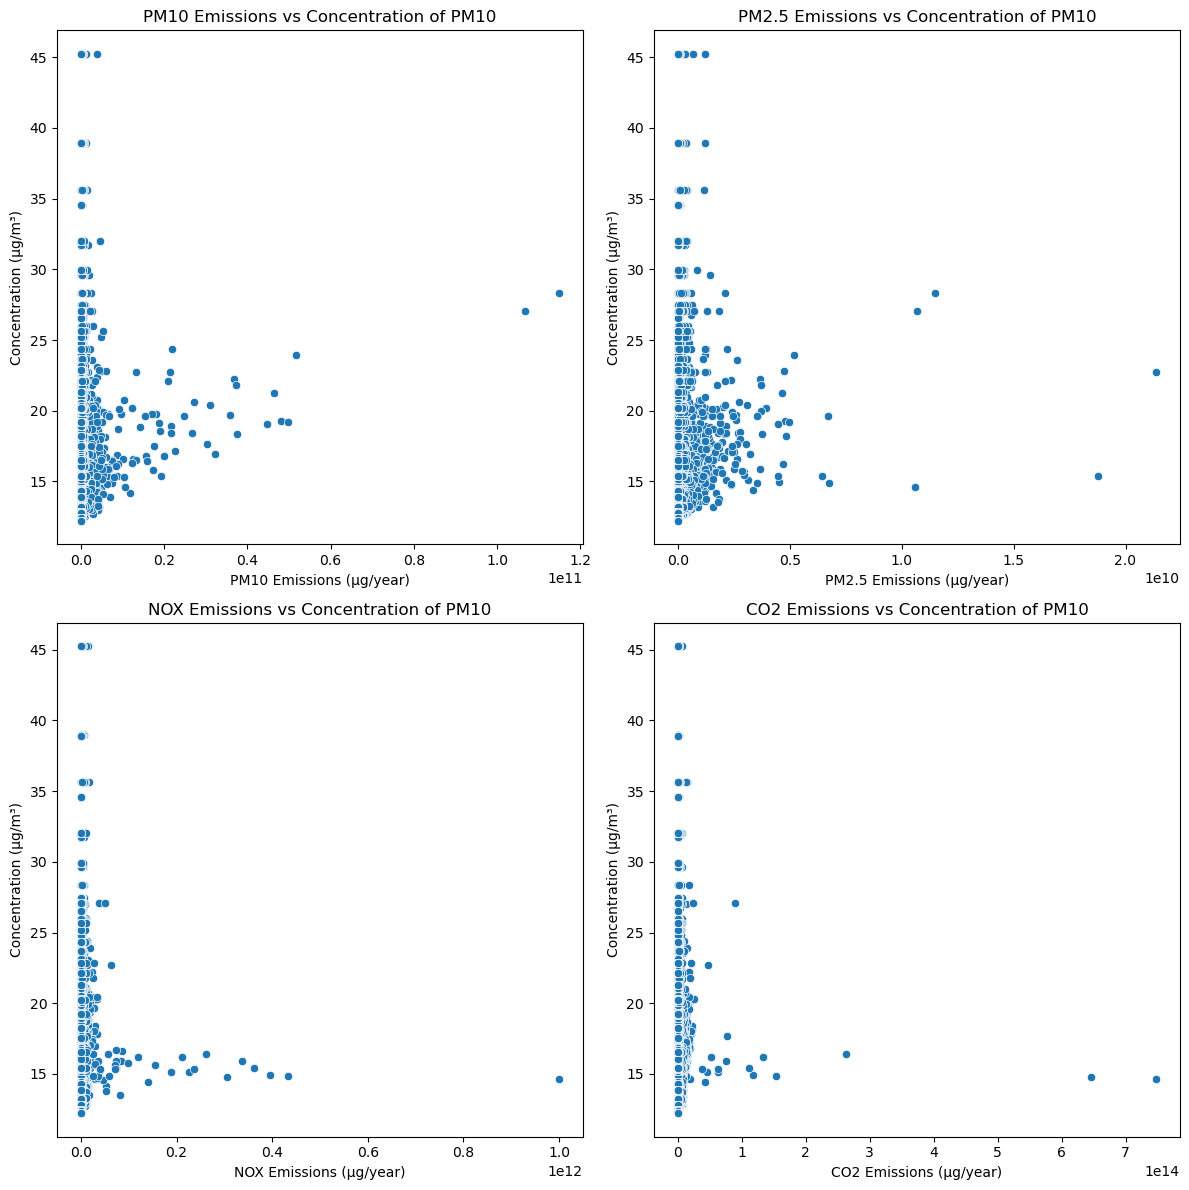

In [112]:
concentration = 'conc_PM10'  

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterate through pollutants to create scatter plots
for i, pollutant in enumerate(pollutants):
    ax = axes[i//2, i%2] 
    sns.scatterplot(data=emission_conc_df, x=pollutant, y=concentration, ax=ax)
    ax.set_title(f'{pollutant.upper()} Emissions vs Concentration of PM10')
    ax.set_xlabel(f'{pollutant.upper()} Emissions (µg/year)')
    ax.set_ylabel('Concentration (µg/m³)')

plt.tight_layout()
plt.show()

In [102]:
correlation = emission_conc_df[['co2', 'nox', 'pm10', 'pm2.5', 'conc_PM10','conc_NO2','conc_NOx','conc_PM25']].corr()
correlation

,co2,nox,pm10,pm2.5,conc_PM10,conc_NO2,conc_NOx,conc_PM25
co2,1.000000,0.817107,0.061547,0.271746,0.025203,0.030205,0.025985,0.027373
nox,0.817107,1.000000,0.088493,0.366940,0.029159,0.043281,0.038023,0.030987
pm10,0.061547,0.088493,1.000000,0.618758,0.069883,0.045210,0.039851,0.052158
pm2.5,0.271746,0.366940,0.618758,1.000000,0.094805,0.088066,0.076435,0.098351
conc_PM10,0.025203,0.029159,0.069883,0.094805,1.000000,0.944923,0.945207,0.959221
conc_NO2,0.030205,0.043281,0.045210,0.088066,0.944923,1.000000,0.968321,0.957430
conc_NOx,0.025985,0.038023,0.039851,0.076435,0.945207,0.968321,1.000000,0.918129
conc_PM25,0.027373,0.030987,0.052158,0.098351,0.959221,0.957430,0.918129,1.000000


Low correlation means that the relationship between emissions and concentrations may not be directly proportional or linear

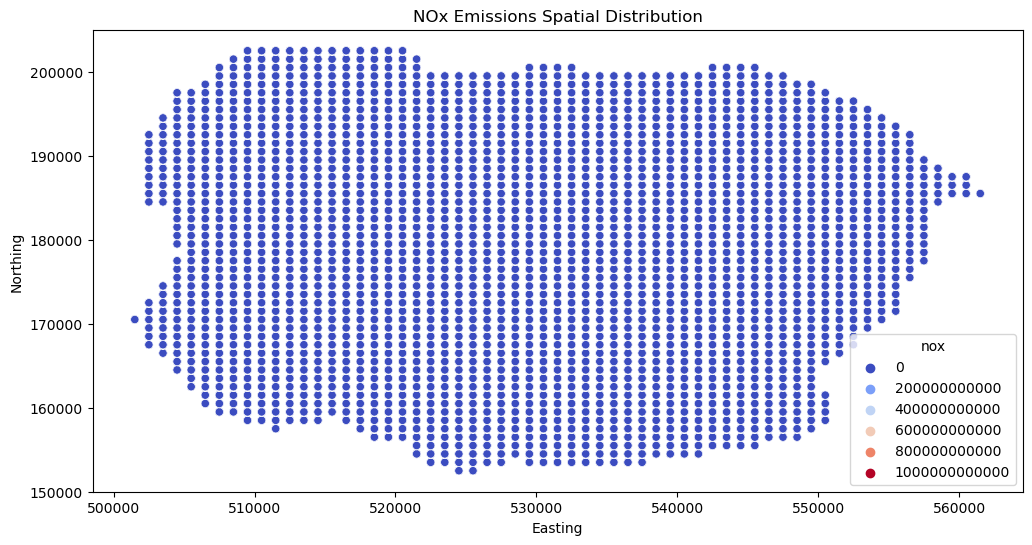

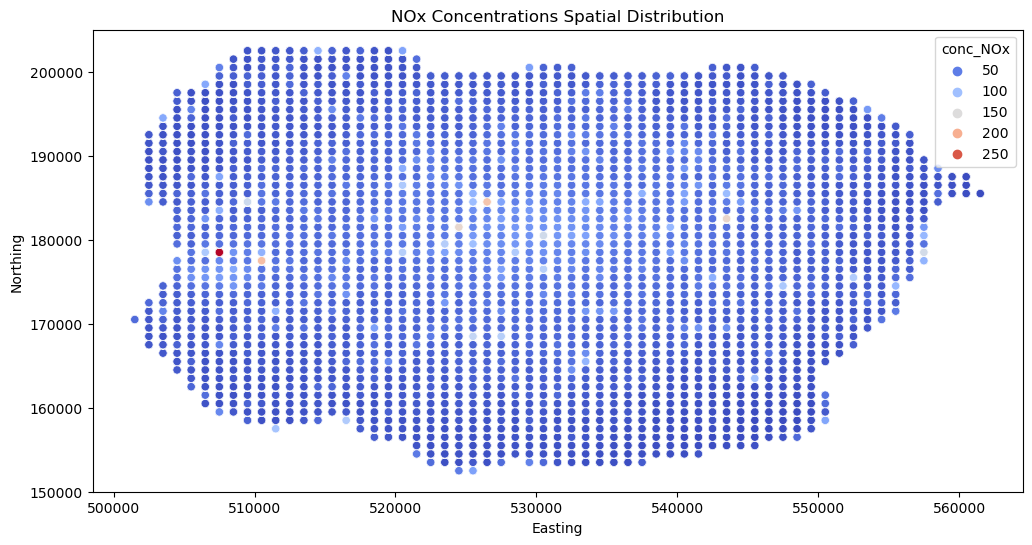

In [107]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Easting', y='Northing', hue='nox', data=emission_conc_df, palette='coolwarm')
plt.title('NOx Emissions Spatial Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Easting', y='Northing', hue='conc_NOx', data=emission_conc_df, palette='coolwarm')
plt.title('NOx Concentrations Spatial Distribution')
plt.show()

To handle the outliers in the emissions data to improve visualizations and models, we can apply a log transformation to the emissions data to reduce the impact of extreme values

In [109]:
emission_conc_df['log_co2'] = np.log1p(emission_conc_df['co2'])
emission_conc_df['log_nox'] = np.log1p(emission_conc_df['nox'])
emission_conc_df['log_pm10'] = np.log1p(emission_conc_df['pm10'])
emission_conc_df['log_pm2.5'] = np.log1p(emission_conc_df['pm2.5'])
emission_conc_df.head()

,Easting,Northing,Main Source Category,Sector,Source,co2,nox,pm10,pm2.5,conc_PM10,conc_NO2,conc_NOx,conc_PM25,log_co2,log_nox,log_pm10,log_pm2.5
0,501500,170500,Domestic,Biomass,Wood Burning,1.430963e+09,2.373553e+06,6.247144e+07,6.247144e+07,14.55704,24.34649,39.31387,9.52714,21.081613,14.679899,17.950220,17.950220
1,501500,170500,Domestic,Heat and Power Generation,Gas Combustion,1.558664e+12,4.123873e+08,3.308787e+07,3.308787e+07,14.55704,24.34649,39.31387,9.52714,28.074850,19.837474,17.314677,17.314677
2,501500,170500,Domestic,Heat and Power Generation,Oil/Coal Combustion,3.845356e+10,4.990587e+07,6.633559e+07,6.535256e+07,14.55704,24.34649,39.31387,9.52714,24.372717,17.725649,18.010237,17.995307
3,501500,170500,Domestic,Machinery,Household and Garden NRMM,4.942293e+09,4.031923e+07,1.026129e+06,1.026129e+06,14.55704,24.34649,39.31387,9.52714,22.321095,17.512339,13.841305,13.841305
4,501500,170500,Industrial and Commercial,Commercial Cooking,Commercial Cooking,1.430963e+09,2.373553e+06,0.000000e+00,0.000000e+00,14.55704,24.34649,39.31387,9.52714,21.081613,14.679899,0.000000,0.000000


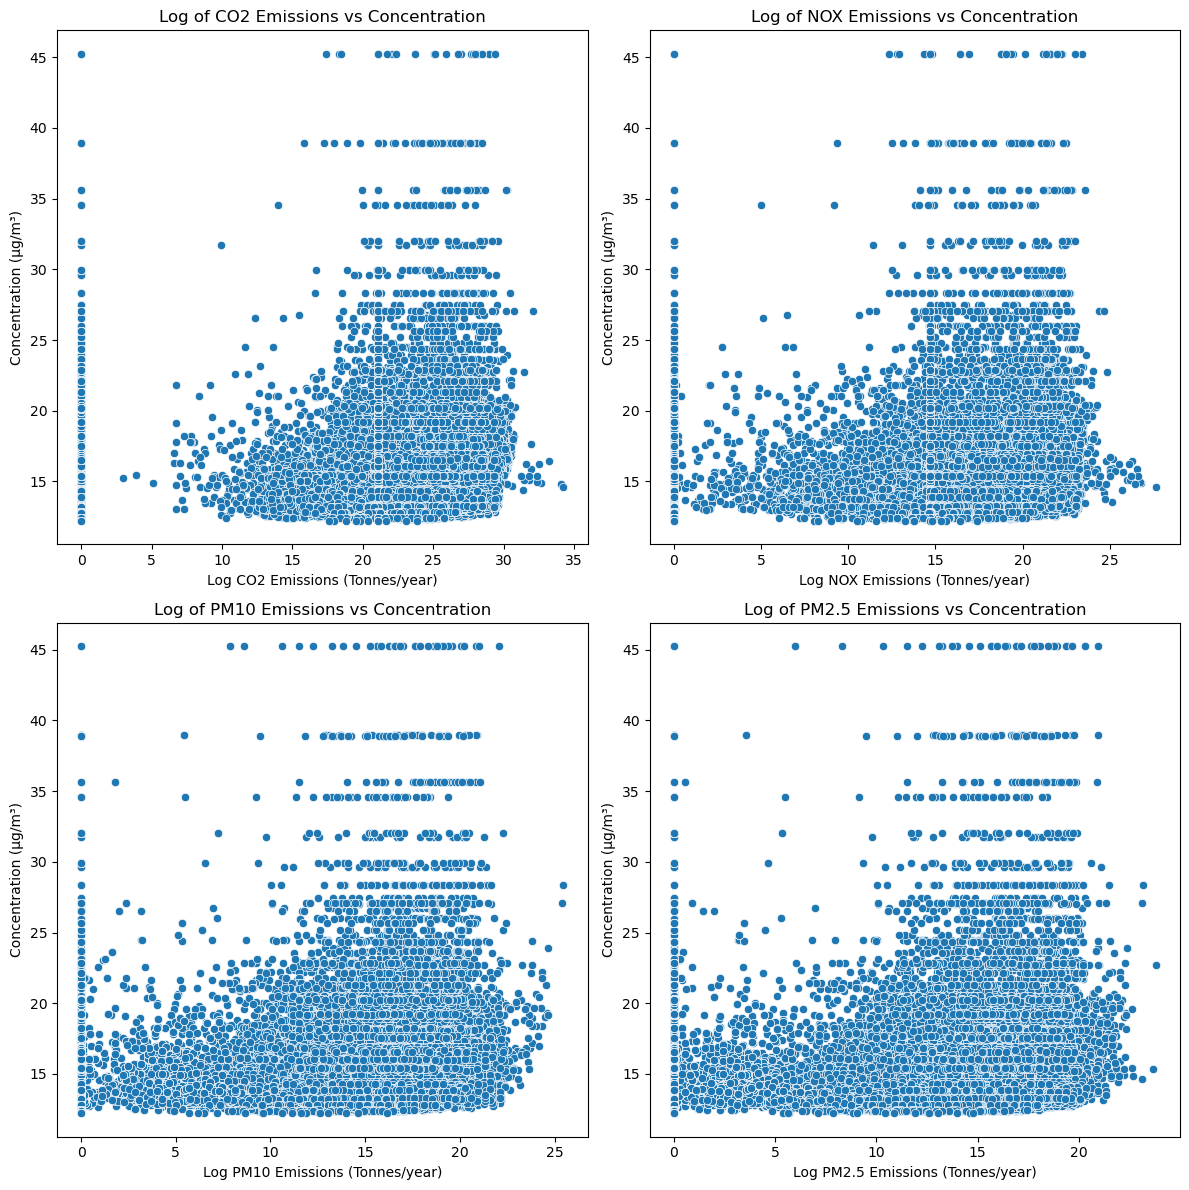

In [113]:
log_pollutants = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterate through pollutants and create scatter plots
for i, pollutant in enumerate(log_pollutants):
    ax = axes[i//2, i%2]  # Access each subplot in a 2x2 grid
    sns.scatterplot(data=emission_conc_df, x=pollutant, y=concentration, ax=ax)
    ax.set_title(f'Log of {pollutant[4:].upper()} Emissions vs PM10 Concentration')
    ax.set_xlabel(f'Log {pollutant[4:].upper()} Emissions (Tonnes/year)')
    ax.set_ylabel('PM10 Concentration (µg/m³)')

plt.tight_layout()
plt.show()

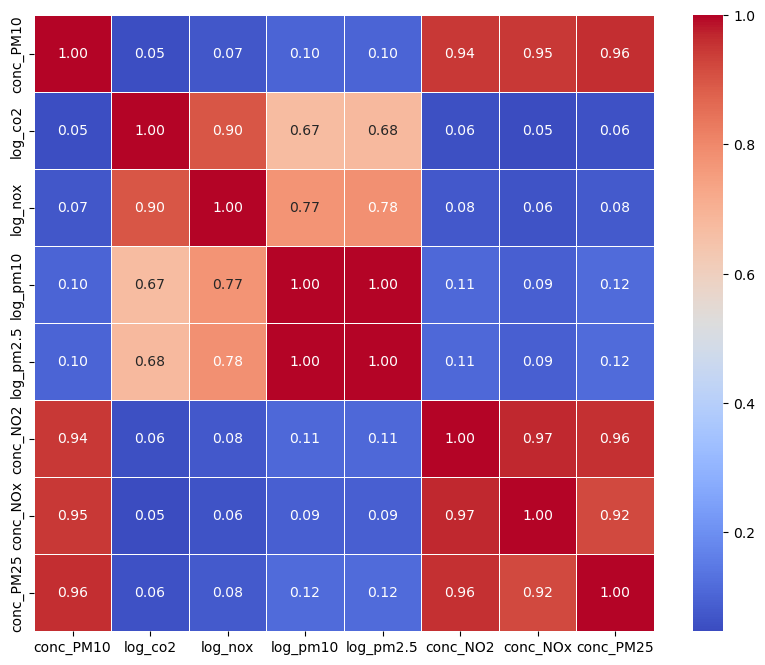

In [132]:
selected_columns = ['conc_PM10', 'log_co2', 'log_nox',
                    'log_pm10', 'log_pm2.5', 'conc_NO2', 'conc_NOx', 'conc_PM25']

# Calculate the correlation matrix for the selected columns
correlation_matrix = emission_conc_df[selected_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Let's analyse the 5000 top concentrations by sector

In [120]:
top_concentrations = emission_conc_df.sort_values(by='conc_NOx', ascending=False).head(5000)
top_concentrations_sector = top_concentrations[['Sector']]
top_concentrations_sector.value_counts()

Sector                   
Road Transport               1777
Waste                         480
Heat and Power Generation     476
Industrial Processes          358
River                         357
Construction                  238
Rail                          238
Accidental Fires              120
Agriculture                   120
Aviation                      120
Forestry                      120
Resuspension                  120
Biomass                       119
Commercial Cooking            119
Gas Leakage                   119
Machinery                     119
Name: count, dtype: int64

In [119]:
emission_conc_df[['Sector']].value_counts()

Sector                   
Road Transport               35022
Heat and Power Generation     9352
Waste                         9352
Industrial Processes          7014
River                         7014
Construction                  4676
Rail                          4676
Accidental Fires              2338
Agriculture                   2338
Aviation                      2338
Biomass                       2338
Commercial Cooking            2338
Forestry                      2338
Gas Leakage                   2338
Machinery                     2338
Resuspension                  2338
Name: count, dtype: int64

Road transport is definetly the top one but it is also the most represented sector in the general df and the proportions in the top_concentrations do not differ from the general proportions. Let's plot into with our spatial coordinates

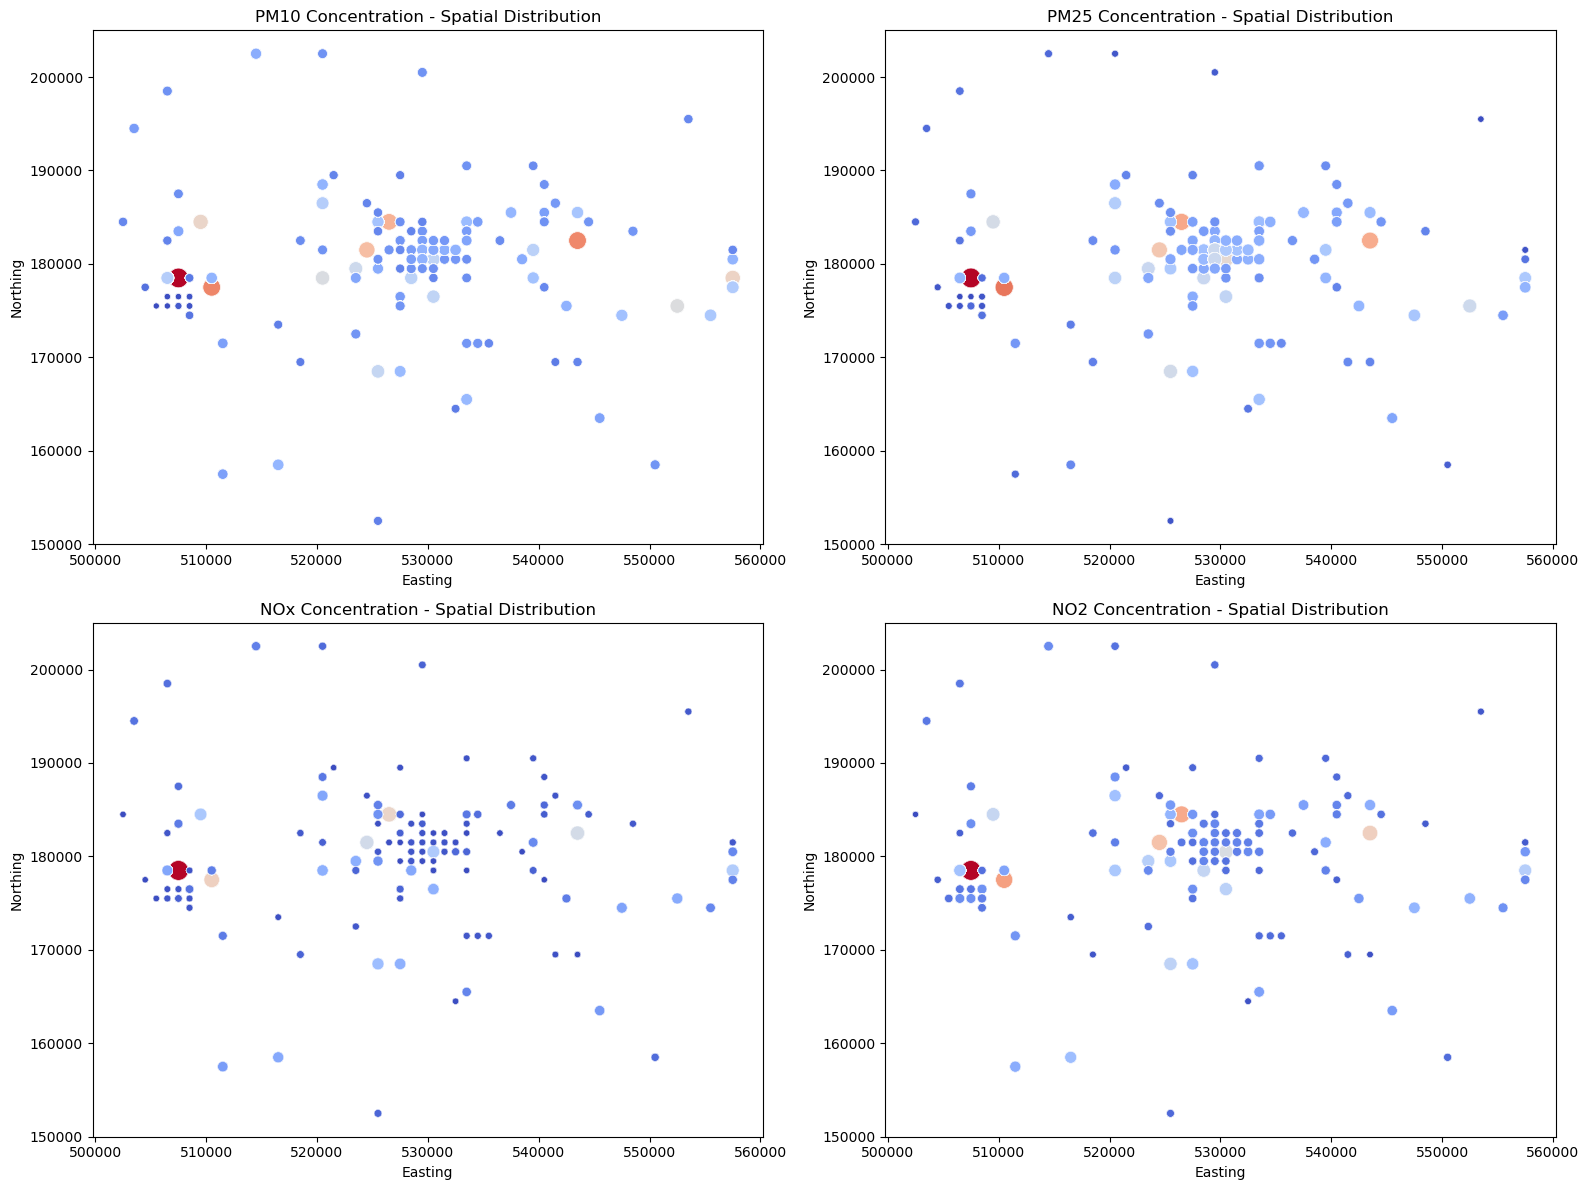

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# List of concentration variables to plot
concentration_columns = ['conc_PM10', 'conc_PM25', 'conc_NOx', 'conc_NO2']
titles = ['PM10 Concentration', 'PM25 Concentration', 'NOx Concentration', 'NO2 Concentration']

# Loop through each concentration variable and plot
for i, ax in enumerate(axes.flat):
    sns.scatterplot(data=road_transport_data, 
                    x='Easting', 
                    y='Northing', 
                    hue=concentration_columns[i],   # Color by concentration
                    palette='coolwarm',  # Choose a color palette
                    size=concentration_columns[i],  # Size of the dots can vary by concentration
                    sizes=(20, 200),  # Min and max size of the dots
                    legend=None,  # Remove the legend for clarity
                    marker='o', 
                    ax=ax)  # Use the specific axis for this subplot
    
    # Set the plot title and labels
    ax.set_title(f'{titles[i]} - Spatial Distribution')
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Multi-Target Prediction**

Let's train three multi-output model that predicts each pollutant's concentration independently

In [133]:
X = emission_conc_df[['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5', 'Easting', 'Northing', 'Source']]
y = emission_conc_df[['conc_NO2', 'conc_NOx', 'conc_PM10', 'conc_PM25']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
numeric_features = ['log_co2', 'log_nox', 'log_pm10', 'log_pm2.5', 'Easting', 'Northing']
categorical_features = ['Source']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# ColumnTransformer to preprocess features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 Random Forest Model

In [139]:
# Define RandomForest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=10)))
])

# Train RandomForest
rf_pipeline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

# Calculate MSE and R²
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf, multioutput='raw_values')
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf, multioutput='raw_values')
train_r2_rf = r2_score(y_train, y_train_pred_rf, multioutput='raw_values')
test_r2_rf = r2_score(y_test, y_test_pred_rf, multioutput='raw_values')

# Print the results for RandomForest
print("RandomForest Training MSE:", train_mse_rf)
print("RandomForest Test MSE:", test_mse_rf)
print("RandomForest Training R²:", train_r2_rf)
print("RandomForest Test R²:", test_r2_rf)

RandomForest Training MSE: [ 5.51141712 40.66978176  1.60390638  0.15958297]
RandomForest Test MSE: [ 5.33063231 39.29264805  1.61706799  0.16000664]
RandomForest Training R²: [0.82665962 0.82294176 0.73955935 0.81099294]
RandomForest Test R²: [0.82843617 0.82420782 0.72949235 0.80679719]


Support Vector Regression (SVR) Model

In [140]:
# Define SVR pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', MultiOutputRegressor(SVR()))
])

# Train SVR
svr_pipeline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_train_pred_svr = svr_pipeline.predict(X_train)
y_test_pred_svr = svr_pipeline.predict(X_test)

# Calculate MSE and R²
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr, multioutput='raw_values')
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr, multioutput='raw_values')
train_r2_svr = r2_score(y_train, y_train_pred_svr, multioutput='raw_values')
test_r2_svr = r2_score(y_test, y_test_pred_svr, multioutput='raw_values')

# Print the results for SVR
print("SVR Training MSE:", train_mse_svr)
print("SVR Test MSE:", test_mse_svr)
print("SVR Training R²:", train_r2_svr)
print("SVR Test R²:", test_r2_svr)

SVR Training MSE: [ 15.76192233 167.52266611   3.67422498   0.34157676]
SVR Test MSE: [ 15.42778753 163.10559915   3.56813356   0.34048191]
SVR Training R²: [0.5042695  0.27068041 0.40338317 0.59544291]
SVR Test R²: [0.50346409 0.27027852 0.40311266 0.58887917]


Gradient Boosting Model

In [141]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', MultiOutputRegressor(GradientBoostingRegressor(random_state=42)))
])

# Train GradientBoosting
gb_pipeline.fit(X_train, y_train)

# Make predictions and evaluate performance
y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb = gb_pipeline.predict(X_test)

# Calculate MSE and R²
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb, multioutput='raw_values')
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb, multioutput='raw_values')
train_r2_gb = r2_score(y_train, y_train_pred_gb, multioutput='raw_values')
test_r2_gb = r2_score(y_test, y_test_pred_gb, multioutput='raw_values')

# Print the results for GradientBoosting
print("GradientBoosting Training MSE:", train_mse_gb)
print("GradientBoosting Test MSE:", test_mse_gb)
print("GradientBoosting Training R²:", train_r2_gb)
print("GradientBoosting Test R²:", test_r2_gb)

GradientBoosting Training MSE: [ 10.77585196 116.46626204   2.63936245   0.27017777]
GradientBoosting Test MSE: [ 10.81509076 117.86677544   2.63554679   0.27483571]
GradientBoosting Training R²: [0.66108712 0.49295741 0.57142307 0.68000653]
GradientBoosting Test R²: [0.65192151 0.47267342 0.55911838 0.66814482]
